# MNIST Using Keras

We implement the hello world of deep learning by implementing a neural network to classify MNIST images using Keras

In [1]:
from keras.datasets import mnist

In [2]:
import matplotlib.pyplot as plt

### Load & Examine The Data

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.ndim

3

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
train_labels.shape

(60000,)

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
test_labels.shape

(10000,)

In [15]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

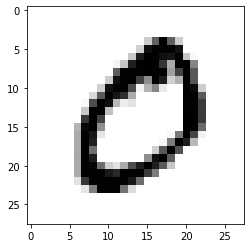

In [6]:
plt.imshow(train_images[1], cmap=plt.cm.binary)

### Build The NetworK

In [16]:
from keras import models
from keras import layers

In [33]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [34]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Reshape The Train Images & Change The Values To Between 0 & 1

In [28]:
train_images[0].shape

(28, 28)

In [30]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [31]:
train_images[0].shape

(784,)

In [36]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Change The Output To Categorical Using One Hot Encoding

In [37]:
from keras.utils import to_categorical

In [38]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [39]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [40]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Train The Model

In [41]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
 20/469 [>.............................] - ETA: 1s - loss: 0.9761 - accuracy: 0.7203  

2023-01-31 13:42:48.407713: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 1s 3ms/step - loss: 0.2644 - accuracy: 0.9229
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1080 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0707 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0517 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0392 - accuracy: 0.9883


### Test On Test Data

In [42]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 581us/step - loss: 0.0667 - accuracy: 0.9790


In [43]:
test_acc

0.9789999723434448